# More Dfsu spectral files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mikeio import Dfsu

## Output from directional-sector-MIKE 21 SW run

MIKE 21 SW can be run with dicretized directions only in a directional sector. The reading and plotting of such spectra are also supported in MIKE IO.

In [2]:
fn = "../tests/testdata/MIKE21SW_dir_sector_area_spectra.dfsu"
dfs = Dfsu(fn)
dfs

DfsuSpectral2D
Number of elements: 40
Number of nodes: 33
Number of frequencies: 25
Number of directions: 19
Projection: LONG/LAT
Items:
  0:  Energy density <Wave energy density> (meter pow 2 sec per deg)
Time: 3 steps with dt=9000.0s
      2017-10-27 00:00:00 -- 2017-10-27 05:00:00

In [3]:
dfs.is_spectral

True

In [4]:
ds = dfs.read(time_steps=0)

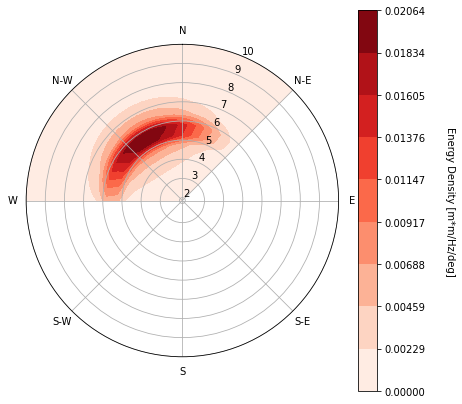

In [5]:
spec=ds[0][0,0]
dfs.plot_spectrum(spec, rmax=10, vmin=0);

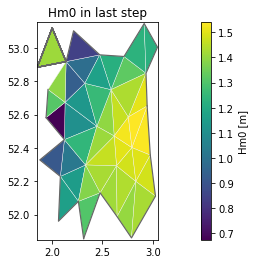

In [7]:
Hm0 = dfs.calc_Hm0_from_spectrum(ds[0][-1].to_numpy())
dfs.plot(Hm0, title="Hm0 in last step", label="Hm0 [m]");

## Frequency spectra

Frequency spectra have 0 directions. They can be of type point, line and area.

### Point frequency spectrum

In [8]:
fn = "../tests/testdata/pt_freq_spectra.dfsu"

In [9]:
dfs = Dfsu(fn)
dfs

DfsuSpectral0D
Number of frequencies: 25
Projection: LONG/LAT
Items:
  0:  Point 1: Directional integrated energy d <Directional integrated spectral density> (meter pow 2 sec)
  1:  Point 1: Directional integrated action d <Undefined> (undefined)
Time: 31 steps with dt=600.0s
      2017-10-27 00:00:00 -- 2017-10-27 05:00:00

In [10]:
ds = dfs.read()

In [11]:
Hm0 = dfs.calc_Hm0_from_spectrum(ds[0].to_numpy())
Hm0

array([1.60962653, 1.64102572, 1.6645511 , 1.68362636, 1.69989174,
       1.71413495, 1.72676635, 1.73643307, 1.74347991, 1.74861355,
       1.75152107, 1.75258486, 1.75209878, 1.75136453, 1.75141064,
       1.75162076, 1.75205508, 1.75275935, 1.75378022, 1.75604349,
       1.75963825, 1.76455812, 1.77079487, 1.77832835, 1.78712444,
       1.79672871, 1.80744369, 1.81880046, 1.83058835, 1.84307072,
       1.85618767])

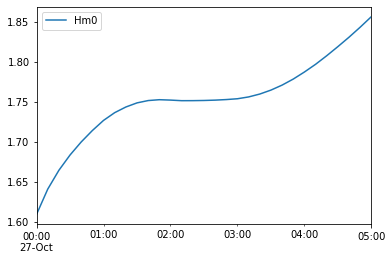

In [12]:
df = pd.DataFrame(Hm0, index=ds.time, columns=["Hm0"])
df.plot();

In [15]:
spec = ds[0][0].to_numpy()
# dfs.plot_spectrum(spec);   # this will fail since the output is Directional integrated

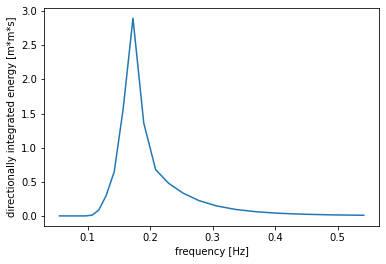

In [16]:
plt.plot(dfs.frequencies, spec)
plt.xlabel("frequency [Hz]")
plt.ylabel("directionally integrated energy [m*m*s]");

### Area frequency spectra

In [17]:
fn = "../tests/testdata/area_freq_spectra.dfsu"
dfs = Dfsu(fn)
dfs

DfsuSpectral2D
Number of elements: 40
Number of nodes: 33
Number of frequencies: 25
Projection: LONG/LAT
Items:
  0:  Directional integrated energy density <Directional integrated spectral density> (meter pow 2 sec)
  1:  Directional integrated action density <Undefined> (undefined)
Time: 3 steps with dt=9000.0s
      2017-10-27 00:00:00 -- 2017-10-27 05:00:00

In [18]:
dfs.n_frequencies, dfs.n_directions

(25, 0)

In [20]:
ds = dfs.read()
spec = ds[0][0,0].to_numpy()

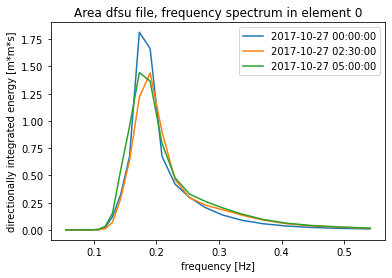

In [22]:
elem = 0
plt.plot(dfs.frequencies, ds[0][:,elem].to_numpy().T)
plt.legend(ds.time)
plt.xlabel("frequency [Hz]")
plt.ylabel("directionally integrated energy [m*m*s]")
plt.title(f"Area dfsu file, frequency spectrum in element {elem}");

## Directional spectra

Directional spectra have 0 frequencies. They can be of type point, line and area.

### Line directional spectra

In [23]:
fn = "../tests/testdata/line_dir_spectra.dfsu"
dfs = Dfsu(fn)
dfs

DfsuSpectral1D
Number of nodes: 10
Number of directions: 16
Projection: LONG/LAT
Items:
  0:  Frequency integrated energy density <Frequency integrated spectral density> (meter pow 2 per rad)
Time: 4 steps with dt=6000.0s
      2017-10-27 00:00:00 -- 2017-10-27 05:00:00

In [24]:
dfs.n_frequencies, dfs.n_directions

(0, 16)

In [26]:
ds = dfs.read()
step = 0
node = 5
spec = ds[0][step, node].to_numpy()

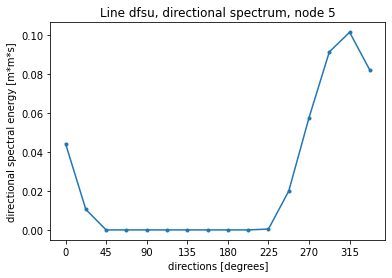

In [27]:
plt.plot(dfs.directions, spec, '.-')
plt.xlabel("directions [degrees]")
plt.ylabel("directional spectral energy [m*m*s]")
plt.title(f"Line dfsu, directional spectrum, node {node}")
plt.gca().set_xticks(dfs.directions[::2]);